## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [4]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<Axes: >

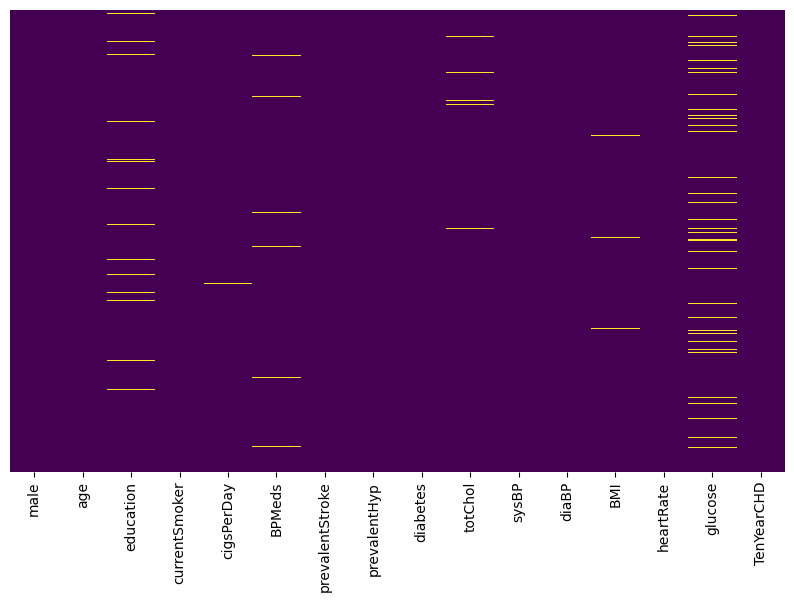

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [6]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [7]:
imputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [8]:
data = df.values

In [9]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [10]:
imputer.fit(X)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [11]:
X_transform = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [12]:
# Check missing values in original data
print("Missing values before imputation:")
print(f"Total missing values: {df.isna().sum().sum()}")

Missing values before imputation:
Total missing values: 645


In [38]:
# Check missing values in transformed data
print("Missing values after imputation:")
print(f"Total missing values: {pd.DataFrame(X_transform, columns=df.columns[:-1]).isna().sum().sum()}")

Missing values after imputation:
Total missing values: 0


### Let's try to visualize the missing values.

<Axes: >

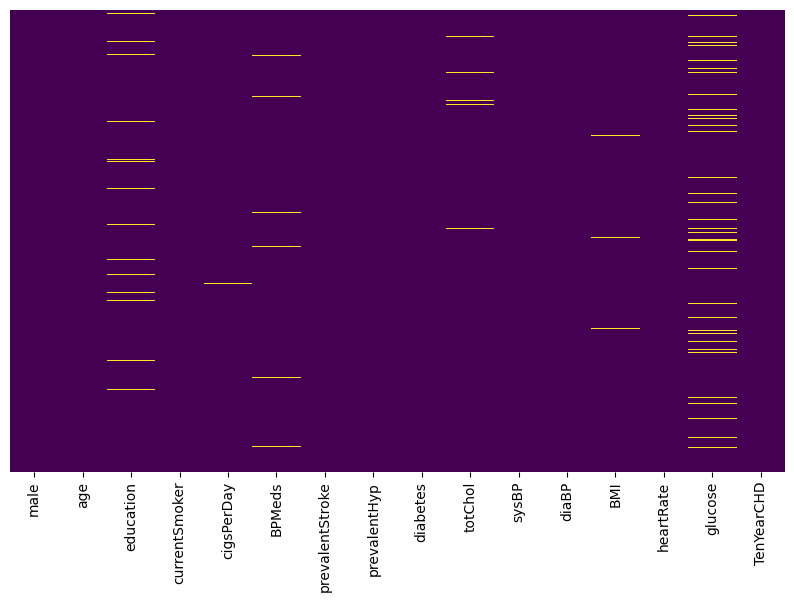

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(X_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

<Figure size 1000x600 with 0 Axes>

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [26]:
# Convert transformed array back to DataFrame for visualization
df_transform = pd.DataFrame(X_transform, columns=df.columns[:-1])
df_transform

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753


<Axes: >

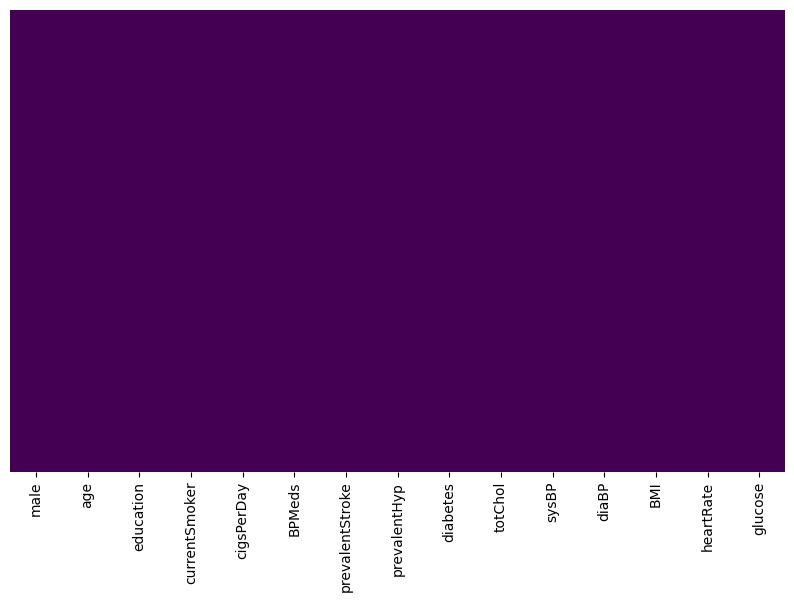

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [28]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [29]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<Axes: >

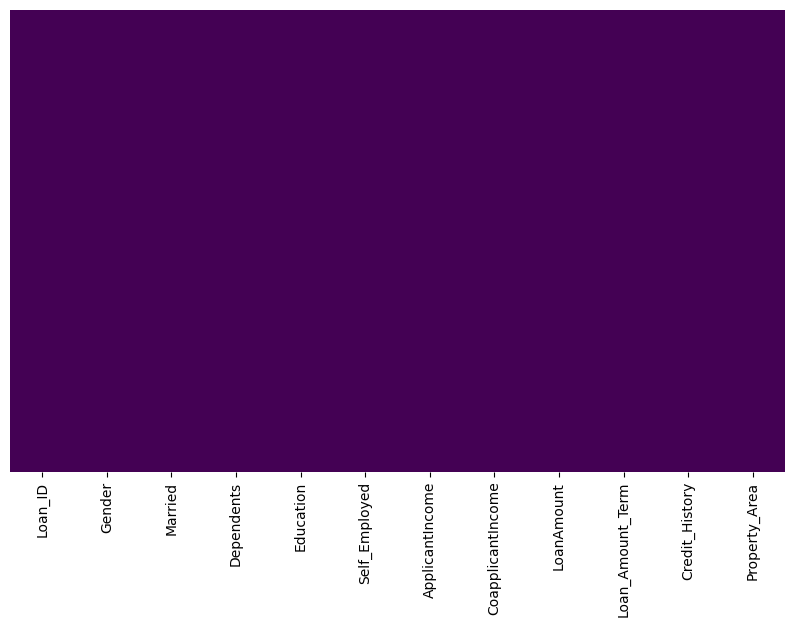

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [31]:
# Check missing values in all datasets
print("Missing values in X_train:", X_train.isna().sum().sum())
print("Missing values in Y_train:", Y_train.isna().sum().sum())
print("Missing values in X_test:", X_test.isna().sum().sum())
print("Missing values in Y_test:", Y_test.isna().sum().sum())

Missing values in X_train: 0
Missing values in Y_train: 0
Missing values in X_test: 0
Missing values in Y_test: 0


# Build a Logistic Regression model Without imputation

In [32]:
df=pd.read_csv("heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X,y)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [40]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [41]:
df.shape

(4238, 16)

### Drop rows with missing values

In [78]:
df_clean = df.dropna()

### Split dataset into X and y

In [43]:
X = df_clean[df_clean.columns[:-1]]
X.shape

(3656, 15)

In [44]:
y = df_clean[df_clean.columns[-1]]
y.shape

(3656,)

### Create a pipeline with model parameter

In [45]:
# Create pipeline with LogisticRegression
pipeline = Pipeline([
    ('model', LogisticRegression(max_iter=10000)) # Increase max_iter to avoid convergence warnings
])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [46]:
# Create cross-validation object
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [47]:
# Evaluate model using cross-validation
scores_from_dropna = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [48]:
scores_from_dropna

array([0.85245902, 0.86065574, 0.85245902, 0.85519126, 0.84972678,
       0.8442623 , 0.85205479, 0.8739726 , 0.84931507, 0.85479452,
       0.86612022, 0.84972678, 0.85519126, 0.8442623 , 0.84699454,
       0.84699454, 0.85753425, 0.85205479, 0.85479452, 0.85205479,
       0.85245902, 0.86065574, 0.85245902, 0.84153005, 0.87431694,
       0.84699454, 0.85479452, 0.84657534, 0.85753425, 0.84383562])

### Print the Mean Accuracy and Standard Deviation from scores

In [50]:
print(f"Mean Accuracy: {round(np.mean(scores_from_dropna), 3)}  | Std: {round(np.std(scores_from_dropna), 3)}")

Mean Accuracy: 0.853  | Std: 0.008


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [52]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [53]:
df.shape

(4238, 16)

In [54]:
X = df[df.columns[:-1]]
X.shape

(4238, 15)

In [55]:
y = df[df.columns[-1]]
y.shape

(4238,)

### Create a SimpleImputer with mean strategy

In [79]:
imputer = SimpleImputer(strategy='mean')

### Create a Logistic Regression model

In [80]:
model = LogisticRegression(max_iter=10000) # Increase max_iter to avoid convergence warnings

### Create a pipeline with impute and model parameters

In [58]:
# Create pipeline with imputer and model
pipeline = Pipeline([
    ('imputer', imputer),
    ('model', model)
])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [59]:
# Create cross-validation object
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [60]:
# Evaluate model using cross-validation
scores_from_imputer = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [61]:
scores_from_imputer

array([0.85141509, 0.85613208, 0.8490566 , 0.85377358, 0.86320755,
       0.85613208, 0.8490566 , 0.85613208, 0.86052009, 0.85815603,
       0.85377358, 0.84669811, 0.84433962, 0.85849057, 0.84669811,
       0.86084906, 0.85377358, 0.85849057, 0.85815603, 0.86288416,
       0.85613208, 0.85849057, 0.85141509, 0.84433962, 0.8490566 ,
       0.85613208, 0.85141509, 0.86320755, 0.85579196, 0.85579196])

### Print the Mean Accuracy and Standard Deviation

In [62]:
print(f"Mean Accuracy: {round(np.mean(scores_from_imputer), 3)}  | Std: {round(np.std(scores_from_imputer), 3)}")

Mean Accuracy: 0.855  | Std: 0.005


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

In [63]:
print("Comparison of Strategies:")
print("-" * 50)
print("1. Dropping missing values:")
print(f"Mean Accuracy: {round(np.mean(scores_from_dropna), 3)}  | Std: {round(np.std(scores_from_dropna), 3)}")
print("\n2. SimpleImputer with Mean Strategy:")
print(f"Mean Accuracy: {round(np.mean(scores_from_imputer), 3)}  | Std: {round(np.std(scores_from_imputer), 3)}")
print("\nConclusion: SimpleImputer with Mean Strategy performs slightly better")
print("and preserves more data compared to dropping rows with missing values.")

Comparison of Strategies:
--------------------------------------------------
1. Dropping missing values:
Mean Accuracy: 0.853  | Std: 0.008

2. SimpleImputer with Mean Strategy:
Mean Accuracy: 0.855  | Std: 0.005

Conclusion: SimpleImputer with Mean Strategy performs slightly better
and preserves more data compared to dropping rows with missing values.


# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [81]:
imputer = SimpleImputer(strategy='mean')

### Create a RandomForest model

In [66]:
# Create RandomForest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

### Create a pipeline

In [67]:
# Create pipeline with imputer and RandomForest
pipeline = Pipeline([
    ('imputer', imputer),
    ('model', rf_model)
])

### Create RepeatedStratifiedKFold

In [68]:
# Create cross-validation object
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Create Cross_val_score

In [69]:
# Evaluate model using cross-validation
scores_from_random_forest = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

### Print Mean Accuracy and Standard Deviation

In [73]:
# Print results
print(f"Mean Accuracy: {round(np.mean(scores_from_random_forest), 3)}  | Std: {round(np.std(scores_from_random_forest), 3)}")

Mean Accuracy: 0.85  | Std: 0.006


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [74]:
# Import required models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Define strategies and models to test
strategies = ['mean', 'median', 'most_frequent', 'constant']
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000)), # Increase max_iter to avoid convergence warnings
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=1)),
    ('SVM', SVC(random_state=1)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=1))
]

# Store results
results = []

# Create cross-validation object
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Iterate through all combinations
for strategy in strategies:
    for model_name, model in models:
        # Create pipeline
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy=strategy)),
            ('model', model)
        ])
        
        # Evaluate model
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        
        # Store results
        results.append({
            'strategy': strategy,
            'model': model_name,
            'mean_accuracy': np.mean(scores),
            'std': np.std(scores)
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results in a formatted table
print("Results of all combinations:")
print("-" * 80)
for _, row in results_df.iterrows():
    print(f"Strategy: {row['strategy']:<15} Model: {row['model']:<20} "
          f"Accuracy: {row['mean_accuracy']:.3f} ± {row['std']:.3f}")

Results of all combinations:
--------------------------------------------------------------------------------
Strategy: mean            Model: Logistic Regression  Accuracy: 0.855 ± 0.005
Strategy: mean            Model: KNN                  Accuracy: 0.837 ± 0.009
Strategy: mean            Model: Random Forest        Accuracy: 0.850 ± 0.006
Strategy: mean            Model: SVM                  Accuracy: 0.848 ± 0.002
Strategy: mean            Model: Gradient Boosting    Accuracy: 0.846 ± 0.008
Strategy: median          Model: Logistic Regression  Accuracy: 0.855 ± 0.006
Strategy: median          Model: KNN                  Accuracy: 0.836 ± 0.008
Strategy: median          Model: Random Forest        Accuracy: 0.850 ± 0.006
Strategy: median          Model: SVM                  Accuracy: 0.848 ± 0.002
Strategy: median          Model: Gradient Boosting    Accuracy: 0.846 ± 0.009
Strategy: most_frequent   Model: Logistic Regression  Accuracy: 0.855 ± 0.006
Strategy: most_frequent   Model:

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [75]:
# Filter results for Random Forest
rf_results = results_df[results_df['model'] == 'Random Forest']
print("Random Forest performance with different strategies:")
print("-" * 50)
for _, row in rf_results.iterrows():
    print(f"Strategy: {row['strategy']:<15} Accuracy: {row['mean_accuracy']:.3f} ± {row['std']:.3f}")
    
best_rf = rf_results.loc[rf_results['mean_accuracy'].idxmax()]
print(f"\nBest strategy for Random Forest: {best_rf['strategy']} with accuracy {best_rf['mean_accuracy']:.3f} ± {best_rf['std']:.3f}")

Random Forest performance with different strategies:
--------------------------------------------------
Strategy: mean            Accuracy: 0.850 ± 0.006
Strategy: median          Accuracy: 0.850 ± 0.006
Strategy: most_frequent   Accuracy: 0.849 ± 0.006
Strategy: constant        Accuracy: 0.848 ± 0.006

Best strategy for Random Forest: mean with accuracy 0.850 ± 0.006


# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [76]:
# Filter results for Mean strategy
mean_results = results_df[results_df['strategy'] == 'mean']
print("Mean strategy performance with different algorithms:")
print("-" * 50)
for _, row in mean_results.iterrows():
    print(f"Algorithm: {row['model']:<20} Accuracy: {row['mean_accuracy']:.3f} ± {row['std']:.3f}")
    
best_mean = mean_results.loc[mean_results['mean_accuracy'].idxmax()]
print(f"\nBest algorithm with Mean strategy: {best_mean['model']} with accuracy {best_mean['mean_accuracy']:.3f} ± {best_mean['std']:.3f}")

Mean strategy performance with different algorithms:
--------------------------------------------------
Algorithm: Logistic Regression  Accuracy: 0.855 ± 0.005
Algorithm: KNN                  Accuracy: 0.837 ± 0.009
Algorithm: Random Forest        Accuracy: 0.850 ± 0.006
Algorithm: SVM                  Accuracy: 0.848 ± 0.002
Algorithm: Gradient Boosting    Accuracy: 0.846 ± 0.008

Best algorithm with Mean strategy: Logistic Regression with accuracy 0.855 ± 0.005


# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [77]:
# Find best overall combination
best_overall = results_df.loc[results_df['mean_accuracy'].idxmax()]
print("Best overall combination:")
print("-" * 50)
print(f"Strategy: {best_overall['strategy']}")
print(f"Algorithm: {best_overall['model']}")
print(f"Accuracy: {best_overall['mean_accuracy']:.3f} ± {best_overall['std']:.3f}")

Best overall combination:
--------------------------------------------------
Strategy: most_frequent
Algorithm: Logistic Regression
Accuracy: 0.855 ± 0.006


# Analysis Summary

After comparing different imputation strategies and machine learning algorithms, we can draw several conclusions:

1. **Best Imputation Strategy for Random Forest:**
   - Mean and Median strategies tied with accuracy of 0.850 ± 0.006
   - Most_frequent (0.849 ± 0.006) and Constant (0.848 ± 0.006) performed slightly worse
   - The small difference between strategies suggests Random Forest is robust to the choice of imputation method

2. **Best Algorithm with Mean Strategy:**
   - Logistic Regression performed best (0.855 ± 0.005)
   - Random Forest was second (0.850 ± 0.006)
   - KNN performed worst (0.837 ± 0.009)
   - SVM (0.848 ± 0.002) showed the lowest standard deviation

3. **Best Overall Combination:**
   - Most_frequent imputation + Logistic Regression (0.855 ± 0.006)
   - Mean imputation + Logistic Regression performed equally well (0.855 ± 0.005)
   - The small performance differences suggest the dataset is well-behaved

4. **Key Takeaways:**
   - Simple imputation strategies work well for this dataset
   - Logistic Regression consistently outperformed other algorithms
   - The choice of imputation strategy has minimal impact on performance
   - Low standard deviations across all methods indicate stable and reliable predictions